In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, desc

In [4]:
from sqlalchemy import inspect

In [5]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [6]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine)

In [7]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [8]:
# Save references to each table
measurement = Base.classes.measurement
station = Base.classes.station

In [9]:
# Create our session (link) from Python to the DB
session = Session(engine)

In [10]:
# Create inspector to inspect db
inspector = inspect(engine)

In [11]:
# Use inspector to get column names
columns = inspector.get_columns('measurement')
for column in columns:
    print(column['name'], column['type'])

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


# Exploratory Precipitation Analysis

In [12]:
# Find the most recent date in the data set.
dates = session.query(func.max(measurement.date))
for date in dates:
    print(date)

('2017-08-23',)


In [13]:
# Calculate the date one year from the last date in data set.
# Perform a query to retrieve the data and precipitation scores
last_year = session.query(measurement.date, measurement.prcp).\
    filter(measurement.date >= "2016-08-23")
for row in last_year:
    print(row)

('2016-08-23', 0.0)
('2016-08-24', 0.08)
('2016-08-25', 0.08)
('2016-08-26', 0.0)
('2016-08-27', 0.0)
('2016-08-28', 0.01)
('2016-08-29', 0.0)
('2016-08-30', 0.0)
('2016-08-31', 0.13)
('2016-09-01', 0.0)
('2016-09-02', 0.0)
('2016-09-03', 0.0)
('2016-09-04', 0.03)
('2016-09-05', None)
('2016-09-06', None)
('2016-09-07', 0.05)
('2016-09-08', 0.0)
('2016-09-09', 0.03)
('2016-09-10', 0.0)
('2016-09-11', 0.05)
('2016-09-12', 0.0)
('2016-09-13', 0.02)
('2016-09-14', 1.32)
('2016-09-15', 0.42)
('2016-09-16', 0.06)
('2016-09-17', 0.05)
('2016-09-18', 0.0)
('2016-09-19', 0.0)
('2016-09-20', 0.0)
('2016-09-21', 0.0)
('2016-09-22', 0.02)
('2016-09-23', 0.0)
('2016-09-24', 0.0)
('2016-09-25', 0.0)
('2016-09-26', 0.06)
('2016-09-27', 0.02)
('2016-09-28', 0.0)
('2016-09-29', 0.0)
('2016-09-30', 0.0)
('2016-10-01', 0.0)
('2016-10-02', 0.0)
('2016-10-03', 0.0)
('2016-10-04', 0.0)
('2016-10-05', 0.0)
('2016-10-06', 0.0)
('2016-10-07', 0.0)
('2016-10-08', 0.0)
('2016-10-09', 0.0)
('2016-10-10', 0.0)
('

In [14]:
# Save the query results as a Pandas DataFrame. Explicitly set the column names
column_name = ['Date', 'Precipitation']
precip = pd.DataFrame((last_year), columns=column_name)
precip

,Date,Precipitation
0,2016-08-23,0.00
1,2016-08-24,0.08
2,2016-08-25,0.08
3,2016-08-26,0.00
4,2016-08-27,0.00
...,...,...
2225,2017-08-19,0.09
2226,2017-08-20,NaN
2227,2017-08-21,0.56
2228,2017-08-22,0.50


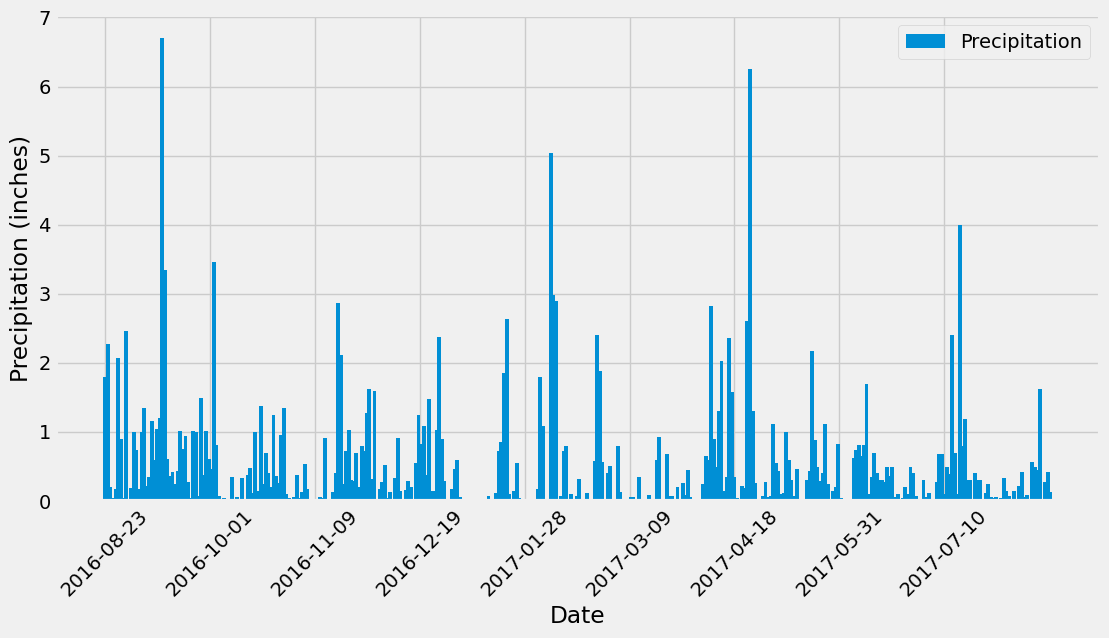

In [15]:
# Use Pandas Plotting with Matplotlib to plot the data
# establishing variables 
fig, ax = plt.subplots(figsize = (12,6))
dates_ticks = ['2016-08-23', '2016-10-01', '2016-11-09', '2016-12-19', '2017-01-28', '2017-03-09', '2017-04-18', '2017-05-31', '2017-07-10']
dates = precip['Date']
rain = precip['Precipitation']

# tick ranges for both axes
x_ticks = np.arange(0, 364, 40.5)
y_ticks = np.arange(0, 8, 1)

# the bar plot
ax.bar(dates, rain, width=1.5)

# set ticks, tick labels, legend, and axis labels
ax.set_xticks(x_ticks)
ax.set_xticklabels(dates_ticks, rotation=45)
ax.set_yticks(y_ticks)
ax.legend(['Precipitation'])
ax.set_xlabel('Date')
ax.set_ylabel('Precipitation (inches)')

# grid for clarity
ax.grid(which='major', alpha=1)

# display the plot
plt.show()

In [16]:
# Use Pandas to calculate the summary statistics for the precipitation data
# https://discuss.datasciencedojo.com/t/how-to-get-summary-statistics-of-a-pandas-dataframe-in-python/1137
precip['Precipitation'].describe()

count    2021.000000
mean        0.177279
std         0.461190
min         0.000000
25%         0.000000
50%         0.020000
75%         0.130000
max         6.700000
Name: Precipitation, dtype: float64

# Exploratory Station Analysis

In [17]:
columns = inspector.get_columns('station')
for column in columns:
    print(column['name'], column['type'])

id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


In [160]:
# Design a query to calculate the total number of stations in the dataset
station_count = session.query(func.count(station.station))
count = [count for count in station_count]
print(count)

[(9,)]


In [161]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.
# https://stackoverflow.com/questions/28033656/finding-most-frequent-values-in-column-of-array-in-sql-alchemy
station_count = session.query(measurement.station, func.count(measurement.id).label('idcount')).\
                                group_by(measurement.station).order_by(desc('idcount'))
stations_with_count = [station for station in station_count]
print(stations_with_count)

[('USC00519281', 2772), ('USC00519397', 2724), ('USC00513117', 2709), ('USC00519523', 2669), ('USC00516128', 2612), ('USC00514830', 2202), ('USC00511918', 1979), ('USC00517948', 1372), ('USC00518838', 511)]


In [162]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
temp_stats = session.query(func.min(measurement.tobs), func.max(measurement.tobs), func.avg(measurement.tobs)).filter(measurement.station == 'USC00519281')
temp_stats_list = [temp for temp in temp_stats]
print(temp_stats_list)

[(54.0, 85.0, 71.66378066378067)]


In [163]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station
last_year_station = session.query(measurement.date, measurement.tobs).\
    filter(measurement.date >= "2016-08-23").filter(measurement.station == 'USC00519281')

# convert query to pandas DataFrame
column_name = ['Date', 'Temperature']
tobs_station = pd.DataFrame((last_year_station), columns=column_name)
tobs_station

,Date,Temperature
0,2016-08-23,77.0
1,2016-08-24,77.0
2,2016-08-25,80.0
3,2016-08-26,80.0
4,2016-08-27,75.0
...,...,...
347,2017-08-14,77.0
348,2017-08-15,77.0
349,2017-08-16,76.0
350,2017-08-17,76.0


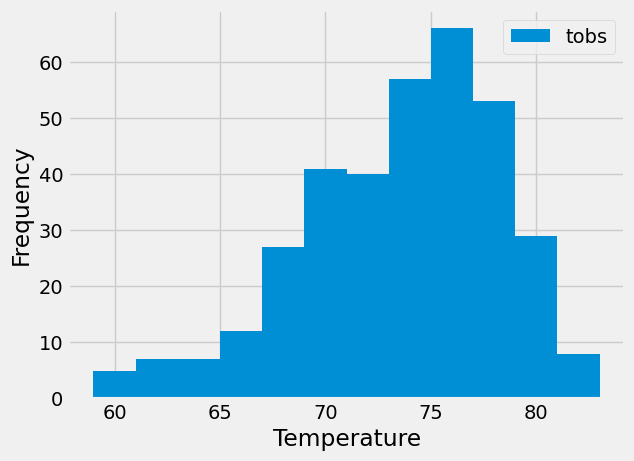

In [164]:
# plot the results as a histogram
temps = tobs_station['Temperature']
bins = 12

plt.hist(temps, bins=bins)
plt.legend(['tobs'])
plt.xlabel('Temperature')
plt.ylabel('Frequency')
plt.show()

# Close Session

In [165]:
# Close Session
session.close()